In [14]:
import sys; sys.path.append('../')

import pickle
import glob
from src.utils.visualization import plot_trues
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
from numpy import nanmean

oversamplers = glob.glob('./*.pickle')

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
@interact
def fn(ov=oversamplers):
    with open(ov, 'rb') as fh:
        res = pickle.load(fh)

    ground_truth = res['ground_truth']
    labels = res['labels']
    plot_trues(
        tps=res['tps'], tps_tfs=res['tp_tfs'], gt=ground_truth,
        labels=labels, tps_err=res['tps_err'], tps_tfs_err=res['tp_tfs_err']
    )
    name = ov.split('/')[1][:-7]
    plt.title(name)
    plt.savefig(name + '.png')

interactive(children=(Dropdown(description='ov', options=('./Assembled_SMOTE.pickle', './SMOTE_IPF.pickle', '.…

In [4]:
for f in glob.glob('../experiments/model_selection/results/*.pickle'):
    if 'results' in f.split('/')[-1]: continue
    try:
        with open(f, 'rb') as fh:
            print(f'\n{"-"*6}{f}{"-"*6}\n', pickle.load(fh), '\n')
    except:
        print(f)


------../experiments/model_selection/results/LinearDiscriminantAnalysis-G_SMOTEDecorator.pickle------
 {'LinearDiscriminantAnalysis__shrinkage': 'auto', 'LinearDiscriminantAnalysis__solver': 'eigen'} 

../experiments/model_selection/results/AdaBoostClassifier-G_SMOTEDecorator.pickle

------../experiments/model_selection/results/DecisionTreeClassifier-G_SMOTEDecorator.pickle------
 {'DecisionTreeClassifier__criterion': 'entropy', 'DecisionTreeClassifier__splitter': 'best'} 

../experiments/model_selection/results/AdaBoostClassifier-ADASYN.pickle

------../experiments/model_selection/results/SVC-ADASYN.pickle------
 {'SVC__C': 0.1, 'SVC__degree': 6, 'SVC__kernel': 'sigmoid'} 


------../experiments/model_selection/results/SVC-G_SMOTEDecorator.pickle------
 {'SVC__C': 0.1, 'SVC__degree': 7, 'SVC__kernel': 'sigmoid'} 


------../experiments/model_selection/results/GaussianNB-ADASYN.pickle------
 {} 


------../experiments/model_selection/results/LinearDiscriminantAnalysis-ADASYN.pickle---

No module named 'sklearn.tree._classes' ../experiments/model_selection/results/AdaBoostClassifier-ADASYN-results.pickle
No module named 'sklearn.tree._classes' ../experiments/model_selection/results/AdaBoostClassifier-G_SMOTEDecorator-results.pickle
../experiments/model_selection/results/RandomForestClassifier ADASYN-results.pickle 0.5583437950937951
../experiments/model_selection/results/KNeighborsClassifier ADASYN-results.pickle 0.677042425516315
../experiments/model_selection/results/DecisionTreeClassifier G_SMOTEDecorator-results.pickle 0.4537785062160062
../experiments/model_selection/results/GaussianNB ADASYN-results.pickle 0.6540295537395975
../experiments/model_selection/results/LinearDiscriminantAnalysis ADASYN-results.pickle 0.6951415721478968
../experiments/model_selection/results/SVC ADASYN-results.pickle 0.6452705666283671
../experiments/model_selection/results/XGBClassifier ADASYN-results.pickle 0.6656338627120137


(0.43, 0.73)

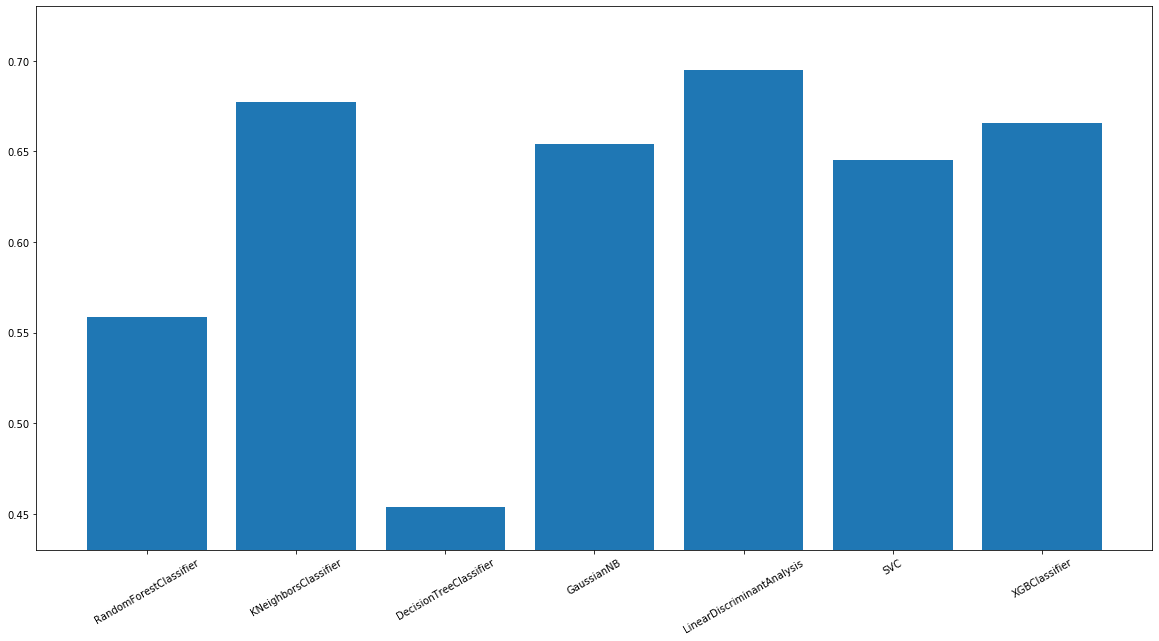

In [20]:
res = {}
for f in glob.glob('../experiments/model_selection/results/*.pickle'):
    if not 'results' in f.split('/')[-1]: continue
    try:
        with open(f, 'rb') as fh:
            results = pickle.load(fh)[0]
        name, resampler = f.split('-', 1)
        res[name] = res.get(name, []) + [{'resampler': resampler, **results}]
    except Exception as e:
        print(e, f)
bests = []
labels = []
finals = []
for model, runs in res.items():
    best_resampler_i = np.argmax([nanmean(runs[0]['mean_test_score']), nanmean(runs[1]['mean_test_score'])])
    best_resampler = runs[best_resampler_i]['resampler']
    score = nanmean(runs[best_resampler_i]['mean_test_score'])
    bests.append(score)
    labels.append(model.split('/')[-1])
    finals.append(model + '-' + best_resampler)
    print(model, best_resampler, score)
    
plt.bar(range(len(bests)), bests)
plt.xticks(range(len(bests)), labels, rotation = 30)
plt.ylim((0.43,.73))

In [21]:
import pandas as pd
pd.Series(bests, index=labels)

RandomForestClassifier        0.558344
KNeighborsClassifier          0.677042
DecisionTreeClassifier        0.453779
GaussianNB                    0.654030
LinearDiscriminantAnalysis    0.695142
SVC                           0.645271
XGBClassifier                 0.665634
dtype: float64

In [17]:
labels, scores, n_features = [], [], []

for final in finals:
    f = final.replace('model_selection', 'feature_selection')
    p = f.replace('-results', '')
    try:
        with open(f, 'rb') as fh:
            results = pickle.load(fh)[0]
        with open(p, 'rb') as fh:
            opts = pickle.load(fh)
    except:
        print(f)
    name = p.rsplit('/', 1)[1]
    labels.append(name.split('-')[0])
    scores.append(results['mean_test_score'].mean())
    n_features.append(opts['FEATURE_SELECTION__k'])

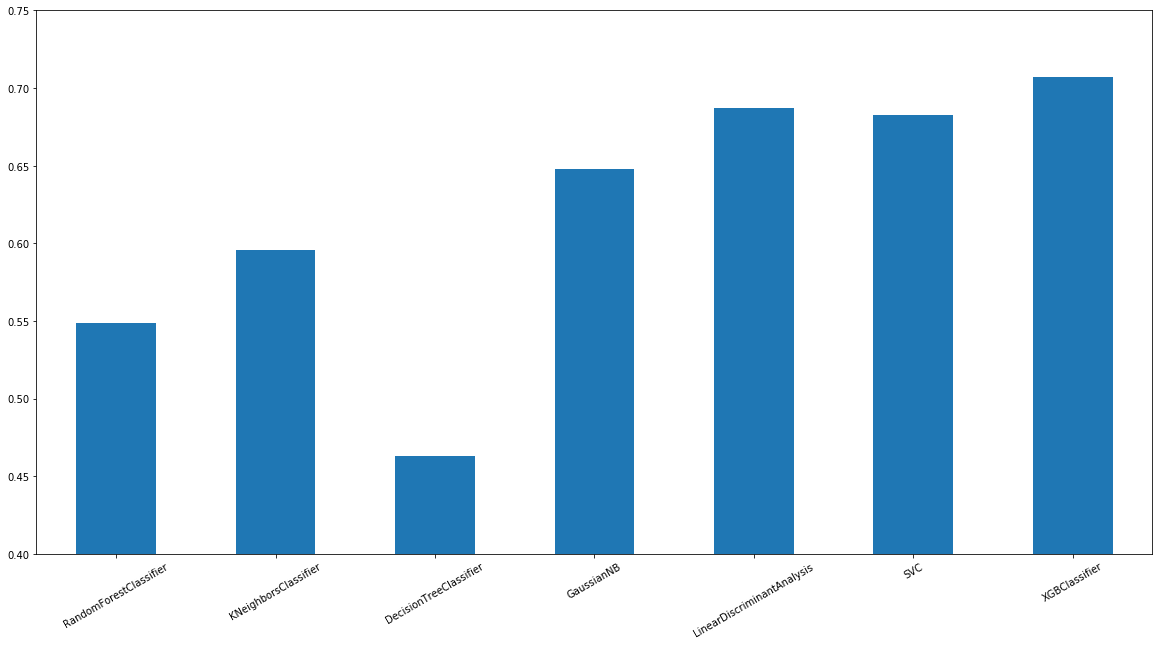

In [18]:
feat = pd.DataFrame([n_features, scores], columns = labels, index=['Number of Features', 'Score']).T

feat['Score'].plot.bar(rot=30, ylim=(0.4,0.75))